# Thor PM100

In [ ]:
from photonicdrivers.thor_pm100 import PM100

In [2]:
pm100 = PM100("pm100", address="USB0::0x1313::0x8078::P0041989::0::INSTR")

In [3]:
pm100.get_idn()

{'vendor': 'Thorlabs',
 'model': 'PM100D',
 'serial': 'P0041989',
 'firmware': '2.8.1'}

In [4]:
pm100.print_readable_snapshot()

pm100:
	parameter       value
--------------------------------------------------------------------------------
IDN              :	None 
averaging        :	None (times)
bandwidth        :	None (nm)
beamdiameter     :	None (mm)
power            :	None (W)
power_range      :	None (W)
power_range_auto :	None 
timeout          :	10 (s)
wavelength       :	None (nm)


In [5]:
print(f"power {pm100.power()} {pm100.power.unit}")
print(f"wavelength {pm100.wavelength()} {pm100.wavelength.unit}")
print(f"beamdiameter {pm100.beamdiameter()} {pm100.beamdiameter.unit}")
print(f"bandwidth {pm100.bandwidth()} {pm100.bandwidth.unit}")
print(f"averaging {pm100.averaging()} {pm100.averaging.unit}")
print(f"power_range {pm100.power_range()} {pm100.power_range.unit}")
print(f"power_range_auto {pm100.power_range_auto()} {pm100.power_range_auto.unit}")


power -3.52373664e-09 W
wavelength 6.000000E+02 nm
beamdiameter 3.0 mm
bandwidth 1.0 nm
averaging 1 times
power_range 1.176184e-05 W
power_range_auto 0 


In [6]:
from qcodes.dataset import do1d, load_or_create_experiment
from qcodes.tests.instrument_mocks import DummyInstrument
load_or_create_experiment(experiment_name='pm100_notebook')

pm100_notebook#some_sample#1@C:\Users\hvx124\experiments.db
-----------------------------------------------------------
1-results-1-dac_ch1-0
2-results-2-dac_ch1,pm100_power-0
3-results-3-dac_ch1,pm100_power-0
4-results-4-dac_ch1,pm100_power-10
5-results-5-dac_ch1,pm100_power-10
6-results-6-dac_ch1,pm100_power-10

In [7]:
dac = DummyInstrument('dac', gates=['ch1', 'ch2'])

Starting experimental run with id: 7. Using 'qcodes.dataset.do1d'


(results #7@C:\Users\hvx124\experiments.db
 -----------------------------------------
 dac_ch1 - numeric
 pm100_power - numeric,
 (<Axes: title={'center': 'Run #7, Experiment pm100_notebook (some_sample)'}, xlabel='Gate ch1 (V)', ylabel='Power (nW)'>,),
 (None,))

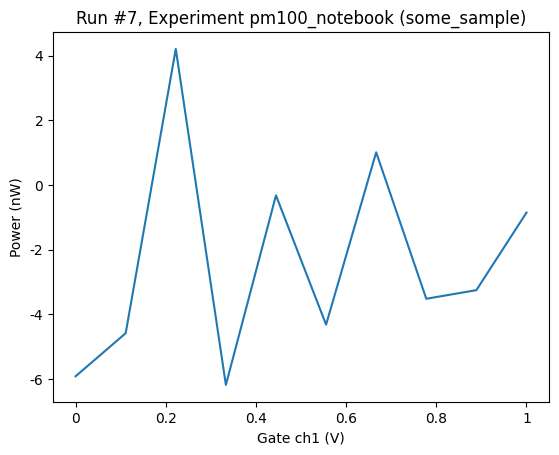

In [8]:
do1d(dac.ch1, 0,1,10,0.11, pm100.power, do_plot=True)